# 注意

レクチャー用なので一度作ったら更新はしない。

最初は次のセルを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

init_printing()

# シンボル定義
k,x,y,z = symbols('k,x,y,z')

# numpy_calculus.ipynb から

## 区分求積法のための基本的な関数

In [2]:
def scatter_integral_body(num_data, is_left, f, param):
    # 描画領域の指定
    fig = plt.figure(figsize=(param["figsize_x"], param["figsize_y"]))
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(param["x_min"], param["x_max"])
    subplot.set_ylim(param["y_min"], param["y_max"])

    # 参考: グラフを折れ線で描く. 折れ線近似の様子を見たい場合に使う.
    #linex = np.linspace(param["x_min"], param["x_max"], num_data) 
    #subplot.plot(linex, f(linex), color='blue')

    # 長方形の描画と面積の近似値計算
    area = 0
    step = (param["x_max"] - param["x_min"]) / num_data
    for x0 in np.arange(param["x_min"], param["x_max"], step):
        x = x0 if is_left else x0 + step
        rect = plt.Rectangle((x0, 0), step, f(x), alpha=param["alpha"])
        subplot.add_patch(rect)
        area += step * f(x)

    subplot.text(param["text_x"], param["text_y"], ('area = %f' % area))

    # 関数と三角関数の描画：上の supplot の処理の後に置かないと上の長方形が描かれない
    vf = np.vectorize(f)

    x_for_square = np.linspace(param["x_min"], param["x_max"], num_max)
    y0 = vf(x_for_square)
    plt.plot(x_for_square, y0, color="red")

## 定積分（区分求積法）のイメージ

### $f(x) = x^2$ を上下から近似

次の定積分を計算する。
比較用の厳密な値は `SymPy` 先生に計算してもらっておく。

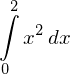

In [3]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**2, (x, 0, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

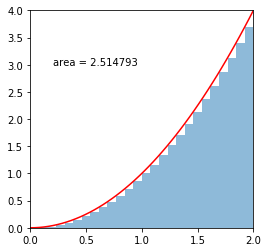

<function __main__.scatter>

In [4]:
def scatter(num_data, is_left):
    def f(x):
        return x**2

    param = {
        "x_min": 0.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 4.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": 0.2,
        "text_y": 3.0,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

### 例：三角形

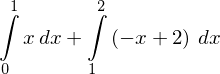

In [5]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x, (x, 0, 1)) + Integral(2-x, (x, 1, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [3]:
def scatter(num_data, is_left):
    def f(x):
        return x if x <=1 else 2-x

    param = {
        "x_min": 0.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 2.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": 0.2,
        "text_y": 1.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

### 例：三角関数

絶対値が噛んでいると `doit()` で厳密な値を出してくれないらしい。
きちんと調べていないが、たぶん関数にもよる。

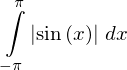

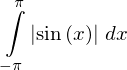

In [7]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(Abs(sin(x)), (x, - pi, pi))
display(d)
display(d.doit())
display(d.doit().evalf())

手で分割すれば大丈夫。

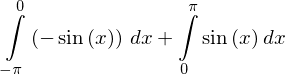

In [8]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(-sin(x), (x, - pi, 0)) + Integral(sin(x), (x, 0, pi))
display(d)
display(d.doit())
display(d.doit().evalf())

### numpy で描画

In [9]:
x_min = 0.0
x_max = 1.0 * np.pi
y_max = 1.0
def scatter(num_data, is_left):
    def f(x):
        return abs(np.sin(x))

    param = {
        "x_min": -1.0 * np.pi,
        "x_max": 1.0 * np.pi,
        "y_min": 0.0,
        "y_max": 1.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -2,
        "text_y": 0.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 100
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=51, description='num_data', min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

### 3次関数

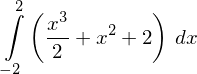

In [10]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**3 / 2 + x**2 + 2, (x, -2, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [11]:
def scatter(num_data, is_left):
    def f(x):
        return x**3 / 2 + x**2 + 2

    param = {
        "x_min": -2.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 12.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

### 4 次関数

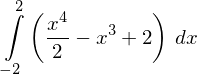

In [12]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**4 / 2 - x**3 + 2, (x, -2, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [13]:
def scatter(num_data, is_left):
    def f(x):
        return x**4 / 2 - x**3 + 2

    param = {
        "x_min": -2.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 20.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 100
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=51, description='num_data', min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

### 円

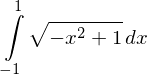

In [14]:
from sympy import Integral, Symbol
import math
x = Symbol('x', real=True)
d = Integral(sqrt(1 - x**2), (x, -1, 1)) # この sqrt は SymPy の 関数
display(d)
display(d.doit())
display(d.doit().evalf())

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

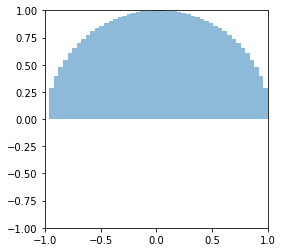

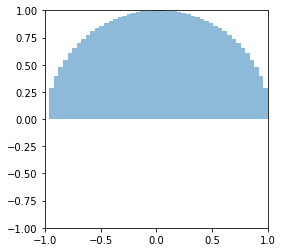

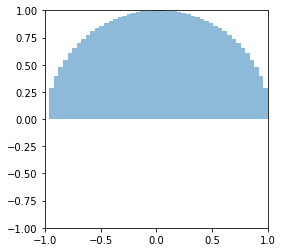

In [15]:
import math

def scatter(num_data, is_left):
    def f(x):
        return math.sqrt(1 - x**2)

    param = {
        "x_min": -1.0,
        "x_max": 1.0,
        "y_min": -1.0,
        "y_max": 1.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -0.5,
        "text_y": 0.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)